In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rc('font', family='GULIM')

In [523]:
BZ = pd.read_csv('Database/future_std/BZ_vol.csv', index_col=0)
only_vol = pd.read_csv('Files/only_vol_2008.csv', index_col=0)
exterior = pd.read_csv('Files/exterior_10_2008.csv', index_col=0)
retrain = pd.read_csv('Files/BiLSTM/additionalX_BZ.csv', index_col=0)
SP_5 = pd.read_csv('Database/spot_std/SP_vol_100.csv', index_col=0)
SP_4 = pd.read_csv('Database/spot_std/SP_vol_384.csv', index_col=0)
SP_6 = pd.read_csv('Database/spot_std/SP_vol_75.csv', index_col=0)
SP = pd.read_csv('Database/spot_std/SP_vol.csv', index_col=0)
SP_s = pd.read_csv('Database/spot_std/SP_vol_sentiment.csv', index_col=0)

only_vol = only_vol.iloc[:-2, :]
exterior = exterior.iloc[:-2, :]
retrain = retrain.iloc[:-2, :]

BZ.index = pd.to_datetime(BZ.index)
SP.index = pd.to_datetime(SP.index)
SP_4.index = pd.to_datetime(SP_4.index)
SP_5.index = pd.to_datetime(SP_5.index)
SP_6.index = pd.to_datetime(SP_6.index)
SP_s.index = pd.to_datetime(SP_s.index)
only_vol.index = pd.to_datetime(only_vol.index)
exterior.index = pd.to_datetime(exterior.index)
retrain.index = pd.to_datetime(retrain.index)

pred = pd.concat([retrain['Predictions'], BZ.iloc[:, 1:]], axis=1).dropna()
truth = pd.concat([retrain['Ground Truths'], BZ.iloc[:, 1:]], axis=1).dropna()

In [524]:
from joblib import load

# 저장한 scaler 파일 경로
scaler_file = 'scaler_0.joblib'

# 저장된 scaler 객체 로드
loaded_scaler = load(scaler_file)

# 로드된 scaler 객체를 사용하여 데이터 변환
pred_inv = loaded_scaler.inverse_transform(pred)
truth_inv = loaded_scaler.inverse_transform(truth)

pred_inv=pd.DataFrame(pred_inv, columns=pred.columns, index=pred.index)
truth_inv=pd.DataFrame(truth_inv, columns=truth.columns, index=truth.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


In [525]:
truth_inv.head(2)

,Ground Truths,S&P500
2005-05-27,0.076667,1198.780029
2005-06-03,0.082247,1196.020020


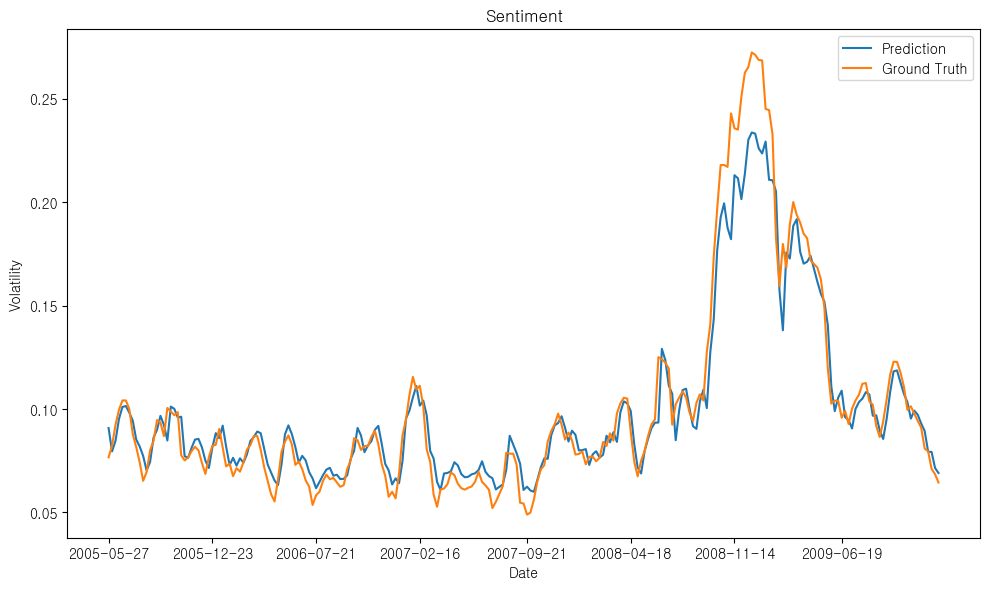

In [526]:
plt.figure(figsize=(10, 6))


# plt.plot(retrain['Predictions'].iloc[:-2], label='Prediction')
# plt.plot(retrain['Ground Truths'].iloc[:-2], label='Ground Truth')
plt.plot(pred_inv.iloc[:,0], label='Prediction')
plt.plot(truth_inv.iloc[:,0], label='Ground Truth')
# plt.plot(only_vol['Predictions'], label='only_vol_Prediction')

plt.title('Sentiment')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(retrain.index[0:-2:30])
plt.tight_layout()
plt.show()

In [527]:
def calculate_mae(gt, output):
    mae = mean_absolute_error(gt, output)
    return mae


def calculate_rmse(gt, output):
    rmse = np.sqrt(mean_squared_error(gt, output))
    return rmse

In [528]:
gt3_v = only_vol.loc[:, 'Ground Truths']
out3_v = only_vol.loc[:, 'Predictions']

gt3 = truth_inv.loc[:, 'Ground Truths']
out3 = pred_inv.loc[:, 'Predictions']

In [529]:
print('only vol total')
print(calculate_mae(gt3_v.values, out3_v.values))
print(calculate_rmse(gt3_v.values, out3_v.values))
print(f'{r2_score(gt3_v.values, out3_v.values):.4f}')

only vol total
0.011483387242638822
0.015458765579990378
0.9327


In [530]:
print('exterior total')
print(calculate_mae(gt3.values, out3.values))
print(calculate_rmse(gt3.values, out3.values))
print(f'{r2_score(gt3.values, out3.values):.4f}')

exterior total
0.008241420715475562
0.012567582046980334
0.9345


In [531]:
gt2_v = only_vol.loc[:'2008-09-01', 'Ground Truths']
out2_v = only_vol.loc[:'2008-09-01', 'Predictions']

gt2 = truth_inv.loc[:'2008-09-01', 'Ground Truths']
out2 = pred_inv.loc[:'2008-09-01', 'Predictions']

In [532]:
print('only vol 변동성 작은 부분')
print(calculate_mae(gt2_v.values, out2_v.values))
print(calculate_rmse(gt2_v.values, out2_v.values))
print()

only vol 변동성 작은 부분
0.007517914255881368
0.011117154031337917


In [533]:
print('exterior 변동성 작은 부분')
print(calculate_mae(gt2.values, out2.values))
print(calculate_rmse(gt2.values, out2.values))

exterior 변동성 작은 부분
0.005725001837172942
0.0073517231356649325


In [534]:
gt_v = only_vol.loc['2008-09-01':'2009-06-01', 'Ground Truths']
out_v = only_vol.loc['2008-09-01':'2009-06-01', 'Predictions']

gt = truth_inv.loc['2008-09-01':'2009-06-01', 'Ground Truths']
out = pred_inv.loc['2008-09-01':'2009-06-01', 'Predictions']

In [535]:
print('only vol 변동성 큰 부분')
print(calculate_mae(gt_v.values, out_v.values))
print(calculate_rmse(gt_v.values, out_v.values))

only vol 변동성 큰 부분
0.01753591376252058
0.02095807799865722


In [536]:
print('exterior 변동성 큰 부분')
print(calculate_mae(gt.values, out.values))
print(calculate_rmse(gt.values, out.values))

exterior 변동성 큰 부분
0.02215497654580644
0.02692106415536137
